In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
plt.style.use("ggplot")
import re
import nltk  # type: ignore
from sklearn.feature_extraction.text import TfidfTransformer ,TfidfVectorizer,CountVectorizer  # type: ignore
from nltk import sent_tokenize , word_tokenize # type: ignore
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,make_scorer # type: ignore
from time import time 
import pickle


from nltk.stem import WordNetLemmatizer  

df=pd.read_csv("dataset.csv")

df.head()

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1


In [3]:
df['label'].unique()

array([-1,  0])

Dataframe manipulation


In [4]:
df.shape

(18148, 2)

In [5]:
def manipulation():
    df = pd.read_csv("dataset.csv")
    df['label'] = df['label'].replace(-1, 1)
    return df


In [6]:
df=manipulation()

In [7]:
df.head()

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1


pie chart to check data split

In [8]:
def dist(df):
    total = df.shape[0]  # Define total number of rows
    non_toxic = df[df.label == 0].shape[0]  # Count non-toxic samples .shape tells how many non toxic people exists 

    # formula to define slices from the given data 
    slices = [non_toxic / total, (total - non_toxic) / total]

    # Labels for each slice since it has 2 classes 
    labelling = ['Non-Toxic', 'Toxic']

#effect 
    explode = [0.2, 0]


    plt.pie(
        slices, 
        explode=explode, 
        shadow=True, 
        autopct="%1.1f%%", 
        labels=labelling, 
        wedgeprops={'edgecolor': 'black'}
    )


    plt.title("Number of toxic vs toxic comments")
    plt.tight_layout()
    plt.show()

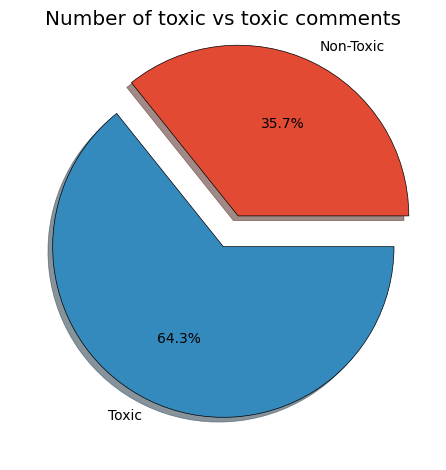

In [9]:
dist(df)

In [10]:
def remove_pattern(input_txt,pattern):
    if(type(input_text)==str):
        r=re.finall(pattern,input_txt)
        for i in r :
            input_txt=re.sub(i, '',input_txt)
            return input_txt
        else:
            return ""

In [11]:
df.head()

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1


In [12]:

nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to remove a specific pattern from text
def remove_pattern(text, pattern="some_pattern"):
    return re.sub(pattern, '', text)

def datasetcleaning(df):
    # Create a new column with the length of each headline
    df["length_headline"] = df['headline'].str.len()
    
    # Duplicate the DataFrame
    combined_df = pd.concat([df, df], ignore_index=True)
    
    # Apply the remove_pattern function to each headline
    combined_df['tidy_tweet'] = np.vectorize(remove_pattern)(combined_df['headline'], r"@[\w]*")

    # Remove special characters and numbers
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

    # Remove short words (less than 4 letters)
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

    # Tokenization
    tokenized_tweet = combined_df['tidy_tweet'].apply(lambda x: x.split())

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

    # Re-join tokens to form cleaned sentences
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

    # Assign cleaned tweets back to the DataFrame
    combined_df['tidy_tweet'] = tokenized_tweet
    
    return combined_df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
datasetcleaning(df)

,headline,label,length_headline,tidy_tweet
0,cock suck before you piss around on my work,1,44,cock suck before piss around work
1,you are gay or antisemmitian archangel white ...,1,624,antisemmitian archangel white tiger meow greet...
2,fuck your filthy mother in the ass dry,1,39,fuck your filthy mother
3,get fuck ed up get fuck ed up got a drink t...,1,121,fuck fuck drink that cant down fuck fuck fuck ...
4,stupid peace of shit stop deleting my stuff ...,1,93,stupid peace shit stop deleting stuff hole fal...
...,...,...,...,...
36291,deepak chahal se baga chutiya maine nahi dekha...,1,68,deepak chahal baga chutiya maine nahi dekha tu...
36292,carry ki maa ki chut,1,20,carry chut
36293,ram kapoor ko priya se pyaar hai kya ?,0,38,kapoor priya pyaar
36294,kya ram kapoor ki behen ke chut mai mera lund ...,1,61,kapoor behen chut mera lund nahi


In [14]:
# Dataset Splitting

from sklearn.model_selection import train_test_split

In [15]:

def performdatasplit(combined_df, x=0.2, random_state=42):
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        combined_df['tidy_tweet'],
        combined_df['label'],
        test_size=x,
        random_state=random_state
    )
    Q
    # Display dataset information
    print(f"Number of rows in total dataset: {combined_df.shape[0]}")
    print(f"Number of rows in training set: {X_train.shape[0]}")
    print(f"Number of rows in testing set: {X_test.shape[0]}")
    
    # Safely open and read the stopwords file
    with open("stopwords.txt", "r") as file: 
        content = file.read()
        content_list = content.split("\n")  # Split by newline
    
    # Create TF-IDF Vectorizer
    tfidvector = TfidfVectorizer(stop_words=content_list, lowercase=True)
    training_data = tfidvector.fit_transform(X_train.values.astype('U'))
    testing_data = tfidvector.transform(X_test.values.astype('U'))  # Fixed typo
    
    # Save the TF-IDF Vectorizer vocabulary
    filename = 'tfidvectorizer.pkl'
    pickle.dump(tfidvector.vocabulary_, open(filename, 'wb'))

    return X_train, X_test, y_train, y_test, testing_data, filename, training_data, content_list




In [16]:
# Clean the dataset first and store the result
combined_df = datasetcleaning(df)

# Now use the cleaned data for splitting
X_train, X_test, y_train, y_test, testing_data, filename, training_data, content_list = performdatasplit(combined_df)


Number of rows in total dataset: 36296
Number of rows in training set: 29036
Number of rows in testing set: 7260


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


Applying machine learning now 

In [17]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [18]:
import xgboost as xgb  
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


In [19]:
def pipeline(X_train, y_train, X_test, y_test):
    MODELS = [LinearSVC(), LogisticRegression(), MultinomialNB(), DecisionTreeClassifier(),
              AdaBoostClassifier(), BaggingClassifier(), SGDClassifier()]
    
    size = len(y_train)
    
    results = {}
    
    final_result = []
    
    for model in MODELS:
        results['Algorithm'] = model.__class__.__name__
        
        start = time()
        print(f"Training Time : {model.__class__.__name__}")
        model.fit(X_train, y_train)
        end = time()
        
        filename = model.__class__.__name__+".pkl"
        pickle.dump(model, open(filename, "wb"))
        
        results['Training Time'] = end - start
        
        start = time()
        prediction_test = model.predict(X_test)
        prediction_train = model.predict(X_train)
        end = time()
        
        results['Prediction Time'] = end - start
        
        results['Accuracy : Test'] = accuracy_score(y_test, prediction_test)
        results['Accuracy : Train'] = accuracy_score(y_train, prediction_train)
        
        results['F1 Score : Test'] = f1_score(y_test, prediction_test)
        results['F1 Score : Train'] = f1_score(y_train, prediction_train)
        
        results['Precision : Test'] = precision_score(y_test, prediction_test)
        results['Precision : Train'] = precision_score(y_train, prediction_train)
        
        results['Recall : Test'] = recall_score(y_test, prediction_test)
        results['Recall : Train'] = recall_score(y_train, prediction_train)
        
        print(f"Training {model.__class__.__name__} finished in {results['Training Time']} sec")
        
        final_result.append(results.copy())
    return final_result
        

In [20]:
def performfinalresult(final_results):
    results = pd.DataFrame(final_results)
    
    # Reorder columns and keep only relevant ones
    results = results[['Algorithm', 'Accuracy : Test', 'Precision : Test', 'Recall : Test', 
                       'F1 Score : Test', 'Prediction Time',
                       'Accuracy : Train', 'Precision : Train', 'Recall : Train', 
                       'F1 Score : Train', 'Training Time']]
    
    # Sort by F1 Score on Test set
    results.sort_values(by='F1 Score : Test', inplace=True, ascending=False)
    
    return results


In [21]:
final_result = pipeline(training_data, y_train, testing_data, y_test)
results = performfinalresult(final_result)
print(results)


Training Time : LinearSVC
Training LinearSVC finished in 0.1350710391998291 sec
Training Time : LogisticRegression
Training LogisticRegression finished in 0.3858764171600342 sec
Training Time : MultinomialNB
Training MultinomialNB finished in 0.008290290832519531 sec
Training Time : DecisionTreeClassifier
Training DecisionTreeClassifier finished in 9.53253984451294 sec
Training Time : AdaBoostClassifier
Training AdaBoostClassifier finished in 6.066589832305908 sec
Training Time : BaggingClassifier
Training BaggingClassifier finished in 79.72228908538818 sec
Training Time : SGDClassifier
Training SGDClassifier finished in 0.07544231414794922 sec
                Algorithm  Accuracy : Test  Precision : Test  Recall : Test  \
3  DecisionTreeClassifier         0.973416          0.972094       0.987215   
5       BaggingClassifier         0.967631          0.973449       0.976561   
0               LinearSVC         0.963636          0.972477       0.971234   
1      LogisticRegression      

In [22]:
# Directly create DataFrame from existing final_result
results_df = pd.DataFrame(final_result)

# Reorder columns and sort by F1 Score on Test set
results_df = results_df[['Algorithm', 'Accuracy : Test', 'Precision : Test', 'Recall : Test', 
                         'F1 Score : Test', 'Prediction Time',
                         'Accuracy : Train', 'Precision : Train', 'Recall : Train', 
                         'F1 Score : Train', 'Training Time']]
results_df.sort_values(by='F1 Score : Test', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
display(results_df)


,Algorithm,Accuracy : Test,Precision : Test,Recall : Test,F1 Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1 Score : Train,Training Time
0,DecisionTreeClassifier,0.973416,0.972094,0.987215,0.979596,0.045612,0.996384,0.995665,0.998712,0.997186,9.532540
1,BaggingClassifier,0.967631,0.973449,0.976561,0.975003,0.538977,0.994042,0.994269,0.996457,0.995362,79.722289
2,LinearSVC,0.963636,0.972477,0.971234,0.971855,0.003120,0.987808,0.991554,0.989425,0.990488,0.135071
3,LogisticRegression,0.935262,0.954771,0.944598,0.949657,0.003009,0.959705,0.971279,0.965752,0.968508,0.385876
4,SGDClassifier,0.934435,0.958868,0.938845,0.948751,0.004206,0.957501,0.973076,0.960331,0.966661,0.075442
5,MultinomialNB,0.897796,0.885313,0.967185,0.924440,0.006988,0.926367,0.915035,0.975844,0.944462,0.008290
6,AdaBoostClassifier,0.767355,0.748758,0.963350,0.842606,1.074562,0.765774,0.746602,0.961136,0.840393,6.066590


In [23]:
results_df.describe().loc[['min','max']]

,Accuracy : Test,Precision : Test,Recall : Test,F1 Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1 Score : Train,Training Time
min,0.767355,0.748758,0.938845,0.842606,0.003009,0.765774,0.746602,0.960331,0.840393,0.008290
max,0.973416,0.973449,0.987215,0.979596,1.074562,0.996384,0.995665,0.998712,0.997186,79.722289


Summary in graph 

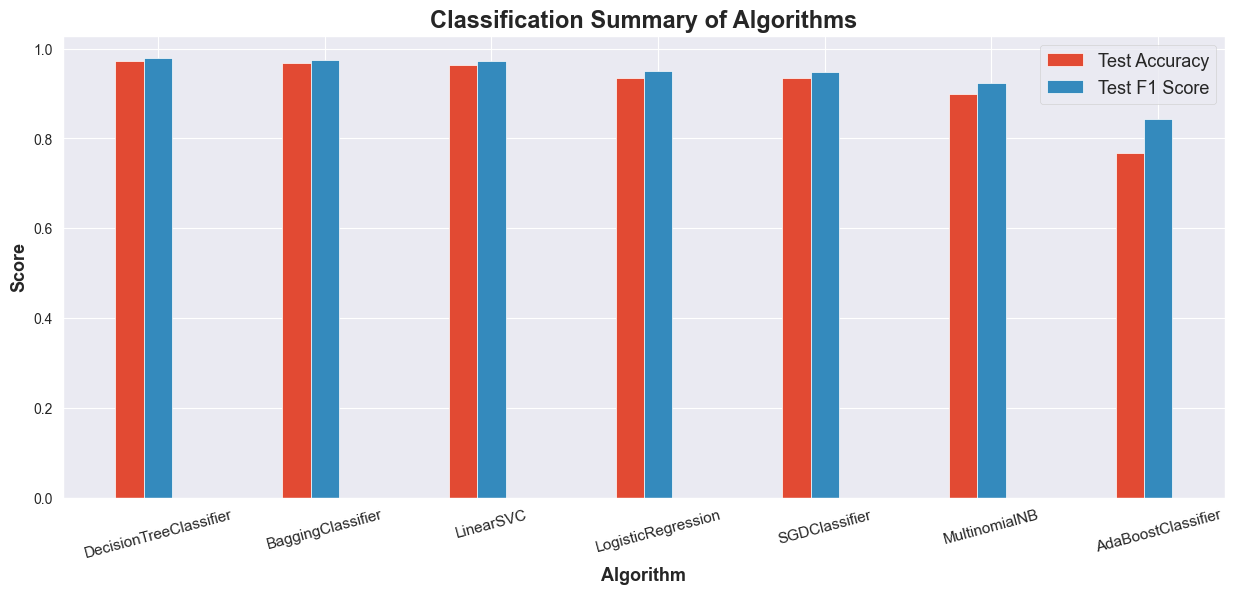

In [24]:
best_acc = results[results['Accuracy : Test'] == results['Accuracy : Test'].max()]
best_f1 = results[results['F1 Score : Test'] == results['F1 Score : Test'].max()]
best_precision = results[results['Precision : Test'] == results['Precision : Test'].max()]
best_recall = results[results['Recall : Test'] == results['Recall : Test'].max()]

sns.set_style('darkgrid')
plt.figure(figsize = (15, 6))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy : Test']
bars2 = results['F1 Score : Test']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Test F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy : Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score : Test'].values[0], best_f1['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

Text(0.5, 1.0, 'Training and Prediction time of Algorithms')

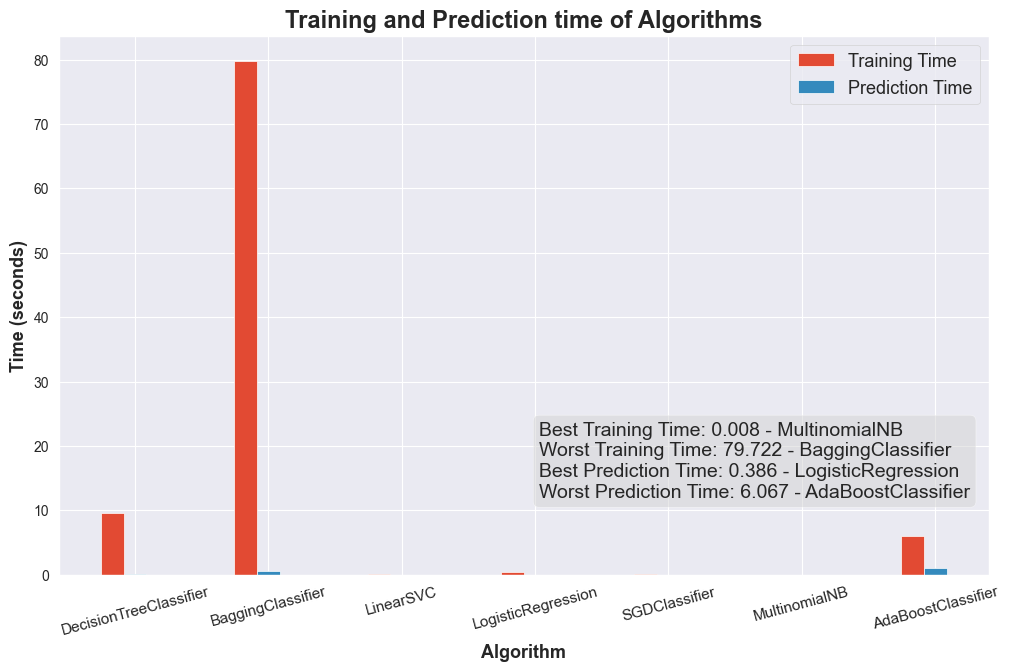

In [25]:

best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)


textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(3.2, 12, textstr, fontsize=14,  bbox=props) 

# Create legend & Show graphic
plt.legend(fontsize = 13)
plt.title('Training and Prediction time of Algorithms', fontweight = 'bold', fontsize = 17)

In [26]:
df.head()

,headline,label,length_headline
0,cock suck before you piss around on my work,1,44
1,you are gay or antisemmitian archangel white ...,1,624
2,fuck your filthy mother in the ass dry,1,39
3,get fuck ed up get fuck ed up got a drink t...,1,121
4,stupid peace of shit stop deleting my stuff ...,1,93


In [34]:
data = ["you are not ugly"]

tfidf_vector = TfidfVectorizer(stop_words=content_list, lowercase=True, vocabulary=pickle.load(open("tfidvectorizer.pkl", "rb")))
preprocessed_data = tfidf_vector.fit_transform(data)

trained_model = pickle.load(open('Ada.pkl', 'rb'))
print(trained_model.predict(preprocessed_data))

if(trained_model.predict(preprocessed_data)==1):
    print("bulling")
else:
    print("non-bulling")

FileNotFoundError: [Errno 2] No such file or directory: '.pkl'

In [194]:
print(combined_df.columns)


Index(['headline', 'label', 'length_headline', 'tidy_tweet'], dtype='object')


In [14]:
!pip install tensorflow keras onnx onnx2tf
!pip install onnx onnx2tf tensorflow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [24]:
import onnx
import onnx2tf
import tensorflow as tf
import tensorflow.keras as keras


ModuleNotFoundError: No module named 'tf_keras'

In [25]:
import onnx2tf
print(onnx2tf.__file__)


ModuleNotFoundError: No module named 'tf_keras'

In [1]:
import onnx
import onnxruntime as ort
import numpy as np
import tensorflow as tf

# Load ONNX model
onnx_model_path = "LinearSVC.onnx"
onnx_model = onnx.load(onnx_model_path)

# Check if the model is in 'ai.onnx.ml' domain
for node in onnx_model.graph.node:
    if node.domain == "ai.onnx.ml":
        print(f"⚠️ Detected ai.onnx.ml domain in node: {node.op_type}")

# Initialize ONNX runtime session
session = ort.InferenceSession(onnx_model_path)

# Extract input and output names
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Extract weights and bias manually from ONNX attributes
weights = None
bias = None

for node in onnx_model.graph.node:
    if node.op_type == "LinearClassifier":  # Check if it's a linear classifier
        for attr in node.attribute:
            if attr.name == "coefficients":
                weights = np.array(attr.floats, dtype=np.float32)
            elif attr.name == "intercepts":
                bias = np.array(attr.floats, dtype=np.float32)

if weights is None:
    raise ValueError("❌ Could not find weights (coefficients) in ONNX model!")

if bias is None:
    bias = np.zeros(1)  # Default bias if not found

# Reshape weights (assumes binary classification)
weights = weights.reshape(-1, session.get_inputs()[0].shape[1])

# Define a TensorFlow equivalent model
class LinearSVCModel(tf.Module):
    def __init__(self, weights, bias):
        super().__init__()
        self.weights = tf.Variable(weights.T, dtype=tf.float32)  # Transposed for TF
        self.bias = tf.Variable(bias, dtype=tf.float32)

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, weights.shape[1]], dtype=tf.float32)])
    def predict(self, x):
        return tf.sign(tf.matmul(x, self.weights) + self.bias)

# Convert to TensorFlow
tf_model = LinearSVCModel(weights=weights, bias=bias)

# Save as a TensorFlow SavedModel
tf.saved_model.save(tf_model, "tf_model")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("tf_model")
tflite_model = converter.convert()

# Save the TFLite model
with open("LinearSVC.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Conversion successful!")


ModuleNotFoundError: No module named 'transformers'

In [32]:
import numpy as np
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="LinearSVC.tflite")
interpreter.allocate_tensors()

# Get input & output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input details for debugging
print("🔹 Input Details:", input_details)
print("🔹 Output Details:", output_details)

# Extract expected input shape
input_shape = input_details[0]['shape']
input_dtype = input_details[0]['dtype']

print(f"✅ Expected Input Shape: {input_shape}, Type: {input_dtype}")

# Generate a sample input that matches the expected shape
input_data = np.random.rand(*input_shape).astype(np.float32)  # Random values

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

print("🔹 Predicted Output:", output_data)


🔹 Input Details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([    1, 31373], dtype=int32), 'shape_signature': array([   -1, 31373], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
🔹 Output Details: [{'name': 'StatefulPartitionedCall:0', 'index': 4, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
✅ Expected Input Shape: [    1 31373], Type: <class 'numpy.float32'>
🔹 Predicted Output: [[-1.  1.]]


In [33]:
import onnx

onnx_model = onnx.load("LinearSVC.onnx")

for inp in onnx_model.graph.input:
    print(f"Input Name: {inp.name}")
    print(f"Input Shape: {inp.type.tensor_type.shape}")


Input Name: input
Input Shape: dim {
}
dim {
  dim_value: 31373
}



In [35]:
import numpy as np
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="LinearSVC.tflite")
interpreter.allocate_tensors()

# Get input & output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input details for debugging
print("🔹 Input Details:", input_details)
print("🔹 Output Details:", output_details)

# Extract expected input shape
input_shape = input_details[0]['shape']
input_dtype = input_details[0]['dtype']

print(f"✅ Expected Input Shape: {input_shape}, Type: {input_dtype}")

# 🔹 Replace this with actual preprocessed text embeddings
# Example: if you use TF-IDF or word embeddings, insert processed data here
# Example (Fake Data): Assume we use a 31373-feature vector for text
text_vector = np.random.rand(1, 31373).astype(np.float32)  # Replace with real embeddings

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], text_vector)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# 🔹 Interpret the results
if output_data[0][0] > output_data[0][1]:  
    print("🔴 Bullying Detected!")
else:
    print("🟢 No Bullying Detected!")


🔹 Input Details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([    1, 31373], dtype=int32), 'shape_signature': array([   -1, 31373], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
🔹 Output Details: [{'name': 'StatefulPartitionedCall:0', 'index': 4, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
✅ Expected Input Shape: [    1 31373], Type: <class 'numpy.float32'>
🟢 No Bullying Detected!


In [46]:
import joblib
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the TF-IDF vectorizer
vectorizer = joblib.load("tfidf_model.pkl")

assert isinstance(vectorizer, TfidfVectorizer), "❌ The loaded file is not a TfidfVectorizer!"
print("✅ TF-IDF Vectorizer loaded successfully!")

# Function to preprocess text
def preprocess_text(text):
    return vectorizer.transform([text]).toarray().astype(np.float32)

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="LinearSVC.tflite")
interpreter.allocate_tensors()

# Get input & output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to convert raw model scores to probabilities
def convert_to_probability(output):
    """Apply softmax-like transformation for interpretation"""
    exp_output = np.exp(output)
    return exp_output / np.sum(exp_output, axis=1, keepdims=True)

# Test sentences
test_sentences = ["I love you", "I hate you, you are so dumb!","Hope you have a great day!","Fuck off loser" ]

for test_sentence in test_sentences:
    input_data = preprocess_text(test_sentence)

    # Ensure input shape matches
    expected_shape = input_details[0]['shape']
    if input_data.shape[1] != expected_shape[1]:
        raise ValueError(f"❌ Dimension mismatch! Model expects {expected_shape[1]} features, but got {input_data.shape[1]}.")

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert to probability-like values
    probabilities = convert_to_probability(output_data)

    # 🔹 Print Raw Model Output
    print(f"\n🔹 Input: '{test_sentence}'")
    print(f"   🔹 Raw Model Output: {output_data}")
    print(f"   🔹 Converted Probabilities: {probabilities}")

    # 🚀 Check which index corresponds to "bullying"
    bullying_probability = probabilities[0][1]  # Assuming index 1 means bullying

    if bullying_probability > 0.5:
        print(f"   🛑 Bullying Detected! (Confidence: {bullying_probability:.2f})")
    else:
        print(f"   🟢 No Bullying Detected! (Confidence: {1 - bullying_probability:.2f})")


✅ TF-IDF Vectorizer loaded successfully!

🔹 Input: 'I love you'
   🔹 Raw Model Output: [[ 1. -1.]]
   🔹 Converted Probabilities: [[0.8807971  0.11920291]]
   🟢 No Bullying Detected! (Confidence: 0.88)

🔹 Input: 'I hate you, you are so dumb!'
   🔹 Raw Model Output: [[-1.  1.]]
   🔹 Converted Probabilities: [[0.11920291 0.8807971 ]]
   🛑 Bullying Detected! (Confidence: 0.88)

🔹 Input: 'Hope you have a great day!'
   🔹 Raw Model Output: [[ 1. -1.]]
   🔹 Converted Probabilities: [[0.8807971  0.11920291]]
   🟢 No Bullying Detected! (Confidence: 0.88)

🔹 Input: 'Fuck off loser'
   🔹 Raw Model Output: [[-1.  1.]]
   🔹 Converted Probabilities: [[0.11920291 0.8807971 ]]
   🛑 Bullying Detected! (Confidence: 0.88)


In [7]:
import pandas as pd
import torch
from datasets import Dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
import os
import subprocess
import sys

def install_and_verify_packages():
    """Installs and verifies required packages."""
    packages = ["pandas", "datasets", "transformers", "scikit-learn", "torch"]

    for package in packages:
        try:
            __import__(package)  # Check if the package is already installed
            print(f"{package} is already installed.")
        except ImportError:
            print(f"Installing {package}...")
            try:
                subprocess.check_call([sys.executable, "-m", "pip", "install", package])
                print(f"{package} installed successfully.")
            except subprocess.CalledProcessError as e:
                print(f"Failed to install {package}: {e}")
                return False

    # Check PyTorch specifically, and reinstall if needed.
    try:
        import torch
        print("PyTorch is installed.")
    except ImportError:
        print("PyTorch is not installed or import failed. Reinstalling...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "torch", "torchvision", "torchaudio"])
            subprocess.check_call([sys.executable, "-m", "pip", "cache", "purge"])
            subprocess.check_call([sys.executable, "-m", "pip", "install", "torch", "torchvision", "torchaudio", "--index-url", "https://download.pytorch.org/whl/cu118"]) # Change cu118 to your cuda version.
            print("PyTorch reinstalled.")
        except subprocess.CalledProcessError as e:
            print(f"Failed to reinstall PyTorch: {e}")
            return False

    return True

if not install_and_verify_packages():
    print("Package installation or verification failed. Exiting.")
    sys.exit(1)

# Uninstall Tensorflow.
try:
    import tensorflow as tf
    print("Tensorflow is installed, uninstalling...")
    subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "tensorflow"])
except ImportError:
    print("Tensorflow is not installed.")

# Load dataset
df = pd.read_csv("dataset.csv")

def preprocess_text(text):
    """Basic text preprocessing."""
    text = text.lower().strip()
    return text

df['text'] = df['text'].apply(preprocess_text)

dataset = Dataset.from_pandas(df)

# Train-test split
dataset = dataset.train_test_split(test_size=0.2)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load model
model = AutoModelForSequenceClassification.from_pretrained("google/gemma-2b", num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    use_mps_device=torch.backends.mps.is_available(),
    use_cuda=torch.cuda.is_available(),
    framework="pt",
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
)

# Train model
trainer.train()

# Save fine-tuned model
model.save_pretrained("./fine_tuned_gemma")
tokenizer.save_pretrained("./fine_tuned_gemma")

print("Fine-tuning completed!")

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_utils because of the following error (look up to see its traceback):
cannot import name 'float8_e4m3b11fnuz' from 'tensorflow.python.framework.dtypes' (C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\framework\dtypes.py)

In [8]:
import importlib
if importlib.util.find_spec("tensorflow"):
    print("TensorFlow is still installed in this environment.")
    exit(1) #exit the script if tensorflow is found.
else:
    print("TensorFlow is not installed in this environment.")

TensorFlow is still installed in this environment.
